## Pandas Veri Görsellestirme

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
plt.close('all') #tüm grafikleri kapat.
plt.show() #grafikleri göster. notebook'ta çalışıyorsanız gerek yok.

In [6]:
ind = pd.date_range(start='2024-01-01', end='2024-01-15', freq='D')
df = pd.DataFrame(data ={
                    "A":np.random.randint(0,1000, len(ind)),
                    "B":np.random.randint(0,1000, len(ind))
                    }, index=ind)

df.head(3)

,A,B
2024-01-01,571,369
2024-01-02,485,968
2024-01-03,746,313


### plot
* kind parametresi ile çeşitli grafik türlerini çizdirebiliriz.
  * `bar` veya `barh`
  * `hist`
  * `box`
  * `kde` veya `density`
  * `area`	
  * `scatter`
  * `hexbin`
  * `pie`

<Axes: xlabel='A', ylabel='B'>

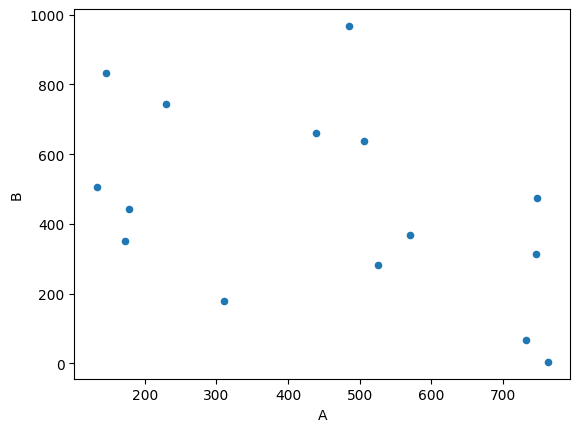

In [11]:
df.plot() #index sütunu x eksenine gelecek şekilde çizdirir. diğer sütunlar y eksenine.
#plt.show()
plt.close('all') #tüm grafikleri kapat.


df.plot(x='A', y='B', kind='scatter')

### Farklı Yöntemlerle Grafikler Oluşturmak
* `df.plot(kind='grafik')`
* `df.plot.grafik()`
* `df.grafik()`

<Axes: >

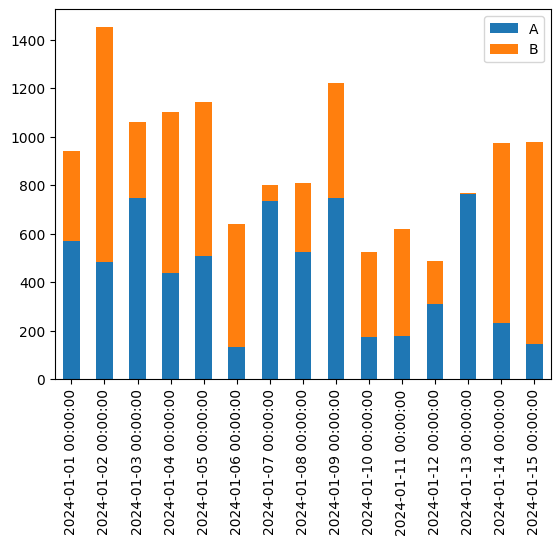

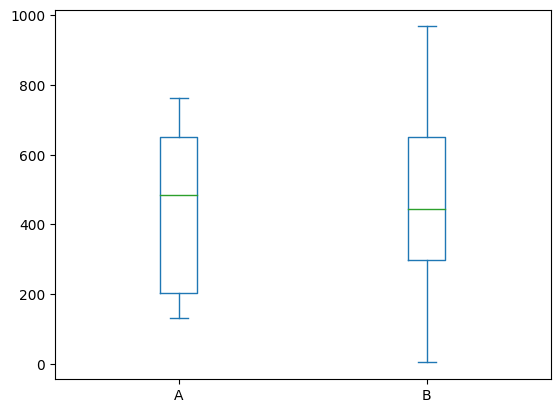

In [21]:
# grafik parametreinde grafik özelliklerini değiştirebiliriz.
#df.plot.scatter(x='A', y='B')
df.plot.bar(stacked=True)

#
#df.box() #hata verir. çünkü boxplot fonksiyonu dataframe üzerinde çalışmaz.
df.plot.box()
#df.plot(kind='box')

### Üste üste grafik çizmek
* önceki grafiği axes olarak al ve sonraki grafiklerde kullan

<Axes: xlabel='A', ylabel='C'>

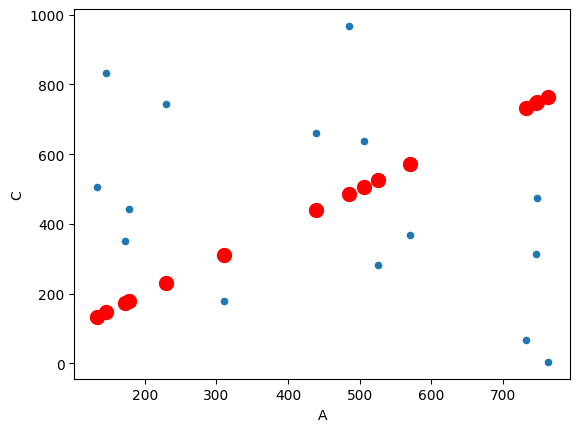

In [26]:
#C kolonu üretelim
df["C"] = df["A"] + df["B"] * 0.001

#
#üst üste çizelim
axes = df.plot.scatter(x="A", y="B")
df.plot.scatter(x="A",y="C", color='red', s=100, ax=axes)  #önceki axes buraya alındı

#### pandas.plotting kullanımı

In [27]:
from pandas.plotting import scatter_matrix, andrews_curves, parallel_coordinates, lag_plot, autocorrelation_plot, bootstrap_plot, radviz

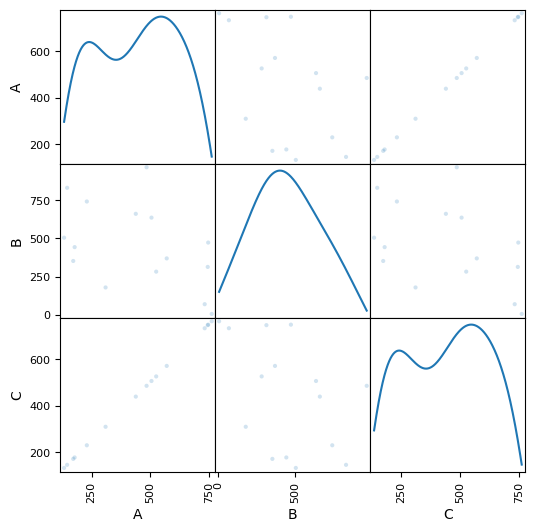

In [30]:
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='density')
plt.show()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


<Axes: >

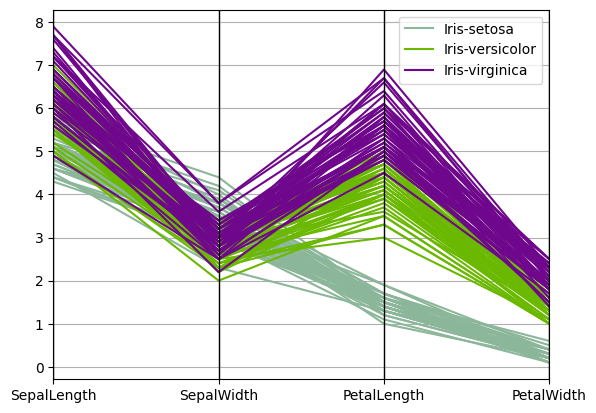

In [33]:
url = 'https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv'

df_iris = pd.read_csv(url)
display(df_iris.head(3))


#
#andrews_curves(df_iris, 'Name')
parallel_coordinates(df_iris, 'Name')

<Axes: >

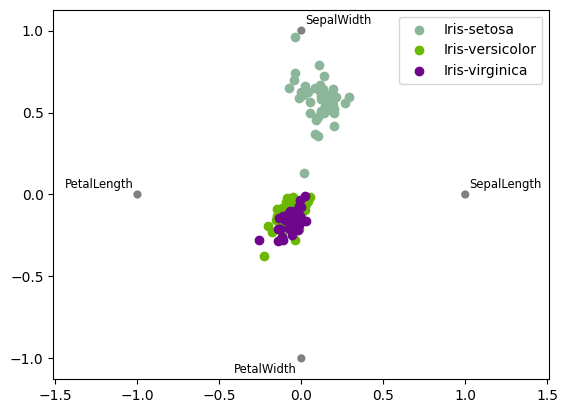

In [35]:
#autocorrelation_plot(df['A']) #özellikle zaman serilerinde kullanılır.
radviz(df_iris, 'Name')

### Subplots

array([[<Axes: >, <Axes: >, <Axes: >]], dtype=object)

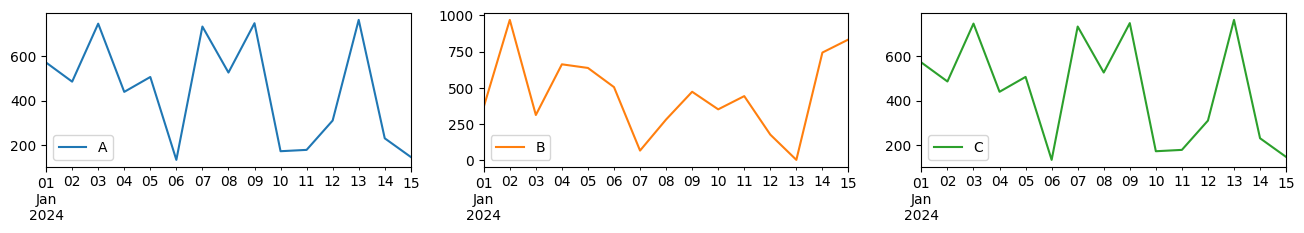

In [39]:
df.plot(subplots=True, layout=(1,3), figsize=(16,2), sharex=False, sharey=False)